In [26]:
 # IMPORT STATEMENTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
import seaborn as sns
import matplotlib as mpl

In [37]:
#LOAD THE CSV FILE & USE THE COLOUMN'S 0,6,9 and 11 
df = pd.read_csv('../data/dftRoadSafetyData_Accidents_2018.csv',usecols=[0,6,9,11],index_col=0,low_memory=False)
df

,Accident_Severity,Date,Time
Accident_Index,,,
2018010080971,3,01/01/2018,01:30
2018010080973,3,01/01/2018,00:50
2018010080974,3,01/01/2018,00:45
2018010080981,2,01/01/2018,03:00
2018010080982,2,01/01/2018,02:20
...,...,...,...
2018984115718,3,23/12/2018,13:45
2018984115918,3,24/12/2018,10:45
2018984116018,3,20/12/2018,18:00


In [28]:
#Reassign Time to store date and time together
df['Time']= df['Date'] + ' ' + df['Time']

In [29]:
#set the type as categorical
df['Accident_Severity'] = df['Accident_Severity'].astype('category')
#Set the type of 'Time' to datetime
df['Time'] = pd.to_datetime(df.Time)
df.dtypes

Accident_Severity          category
Date                         object
Time                 datetime64[ns]
dtype: object

In [30]:
#Rename the Accident severity categories
sev = {
    'Fatal',
    'Serious',
    'Slight',
}
df['Accident_Severity'] = df['Accident_Severity'].cat.rename_categories(['Fatal', 'Serious', 'Slight'])
df.head(15)

,Accident_Severity,Date,Time
Accident_Index,,,
2018010080971,Slight,01/01/2018,2018-01-01 01:30:00
2018010080973,Slight,01/01/2018,2018-01-01 00:50:00
2018010080974,Slight,01/01/2018,2018-01-01 00:45:00
2018010080981,Serious,01/01/2018,2018-01-01 03:00:00
2018010080982,Serious,01/01/2018,2018-01-01 02:20:00
2018010080983,Slight,01/01/2018,2018-01-01 01:52:00
2018010080986,Serious,01/01/2018,2018-01-01 05:47:00
2018010080987,Slight,01/01/2018,2018-01-01 04:40:00
2018010080990,Slight,01/01/2018,2018-01-01 00:30:00


In [31]:
#Drop the date column
df.drop(['Date'],axis=1)

,Accident_Severity,Time
Accident_Index,,
2018010080971,Slight,2018-01-01 01:30:00
2018010080973,Slight,2018-01-01 00:50:00
2018010080974,Slight,2018-01-01 00:45:00
2018010080981,Serious,2018-01-01 03:00:00
2018010080982,Serious,2018-01-01 02:20:00
...,...,...
2018984115718,Slight,2018-12-23 13:45:00
2018984115918,Slight,2018-12-24 10:45:00
2018984116018,Slight,2018-12-20 18:00:00


In [32]:
#Count the total number categories
counts = df['Accident_Severity'].value_counts(sort=True)
counts

Slight     97799
Serious    23165
Fatal       1671
Name: Accident_Severity, dtype: int64

In [33]:
#Reassign time to be just the hours in order to do a scatter plot
df['Time']= df['Time'].dt.hour

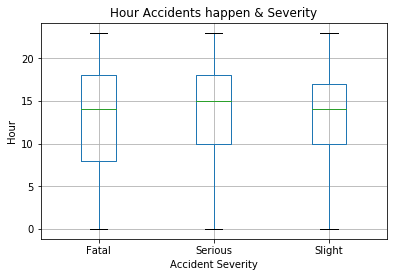

In [36]:
#Plot the Box plot of hour severe accidents happened
ax = df.boxplot(by='Accident_Severity') 
ax.set_title('Hour Accidents happen & Severity') 
ax.figure.suptitle('')
ax.set_xlabel('Accident Severity') 
ax.set_ylabel('Hour')
plt.show()